In [1]:
import pandas as pd
from itertools import islice
import seaborn as sns
import matplotlib

In [2]:
url = "/bigdata/jelicicna/output_datasets/distances_table_nextbike_2020-04.csv.gz"
#url_pr = "processed_data_nextbike_2020-06cc.csv"
df = pd.read_csv(url, sep=';', low_memory=False)
#df_pr = pd.read_csv(url, sep=';', low_memory=False)

In [3]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [4]:
pd.set_option('display.max_columns()', None)

#### Function for limiting possible lengths of distances to 2500meters in order to work with one part of data without extreme values

In [5]:
def drop_duplicates(l):
    '''Droping duplicates from a list while maintaining order'''
    seen = set()
    seen_add = seen.add
    return [x for x in l if not (x in seen or seen_add(x))]

In [6]:
def short_list(time):
    return [x for x in sr[time] if x < 2500]

In [7]:
df = df.drop(['bike', 'bike_racks', 'bikes', 'booked_bikes', 'free_racks', 'free_special_racks', 'maintenance', 'number', 
              'place_type', 'rack_locks', 'special_racks', 'spot', 'terminal_type', 'city',
              'country_code', 'company', 'timezone'], axis=1)

df.drop(['index'], axis=1, inplace=True)

In [8]:
df.head()

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
0,50.936737,6.913359,50.932947,6.923582,2020-04-01 15:08:02,2020-04-01 15:17:01,9.0,831.0,28797840,28811243,908.0,NaN,BIKE 22473,1189
1,50.932947,6.923582,50.936538,6.913588,2020-04-01 15:26:03,2020-04-01 15:32:02,6.0,806.0,28811243,28811523,9.0,NaN,BIKE 22473,1170
2,50.936538,6.913588,50.948238,6.920757,2020-04-01 21:13:02,2020-04-01 21:26:01,13.0,1395.0,28811523,28818223,341.0,NaN,BIKE 22473,1162
3,50.948238,6.920757,50.948725,6.926645,2020-04-02 12:02:02,2020-04-02 13:41:02,99.0,416.0,28818223,28824272,876.0,NaN,BIKE 22473,1189
4,50.948725,6.926645,50.954006,6.926610,2020-04-02 14:46:02,2020-04-02 14:51:02,5.0,587.0,28824272,28826848,65.0,NaN,BIKE 22473,1165


In [9]:
negative_values = df[df['ride_time'] < 0].index.to_list()
negative_values

[]

In [10]:
#use only if there are values that you need to drop in negative values
#df.drop(negative_values, inplace=True)

In [11]:
out_rides = []
for index, row in df.iterrows():
    if (row['ride_time'] < 2) or (row['ride_time'] >= 700):
        out_rides.append(index)

In [12]:
out_distances_total = []
for index, row in df.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances_total.append(index)

In [13]:
len(df)

58229

In [14]:
len(out_distances_total)

9294

In [15]:
len(out_rides)

7975

In [16]:
out_set = len(set(out_rides + out_distances_total))
out_set

12832

In [17]:
# Function to callculate the intersection of two lists
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [18]:
intersect = intersection(out_rides, out_distances_total)
len(intersect)

4437

In [19]:
df_limit = df.drop(out_rides, axis=0)

In [20]:
df_limit['distance'].value_counts()

10.0       80
12.0       77
11.0       76
8.0        73
7.0        67
18.0       67
6.0        66
5.0        65
4.0        64
9.0        63
19.0       62
13.0       62
14.0       62
16.0       61
17.0       58
21.0       58
23.0       56
22.0       52
15.0       49
31.0       49
35.0       47
24.0       46
27.0       45
30.0       41
20.0       40
3.0        40
39.0       39
32.0       39
44.0       39
36.0       37
           ..
7536.0      1
5597.0      1
5833.0      1
3942.0      1
6089.0      1
7515.0      1
5947.0      1
4397.0      1
5142.0      1
5140.0      1
4943.0      1
4871.0      1
4797.0      1
7813.0      1
11074.0     1
4957.0      1
9469.0      1
6066.0      1
5053.0      1
10495.0     1
6773.0      1
7142.0      1
6260.0      1
5653.0      1
7830.0      1
4615.0      1
8887.0      1
6659.0      1
6287.0      1
6343.0      1
Name: distance, Length: 6536, dtype: int64

In [21]:
out_distances = []
for index, row in df_limit.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances.append(index)

In [22]:
len(out_distances)

4857

In [23]:
len(out_distances + out_rides)

12832

In [24]:
quotient = len(out_distances + out_rides) / len(df)
percent = quotient * 100
print(percent)

22.037129265486268


In [25]:
df_c = df_limit.drop(out_distances, axis=0)
df_c.reset_index(inplace=True)

In [26]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45397 entries, 0 to 45396
Data columns (total 15 columns):
index                   45397 non-null int64
lat_begin               45397 non-null float64
lng_begin               45397 non-null float64
lat_end                 45397 non-null float64
lng_end                 45397 non-null float64
ride_begin              45397 non-null object
ride_end                45397 non-null object
ride_time               45397 non-null float64
distance                45397 non-null float64
uid_begin               45397 non-null int64
uid_end                 45397 non-null int64
standing_before_ride    45397 non-null float64
address                 234 non-null object
name                    45397 non-null object
available_bikes         45397 non-null int64
dtypes: float64(7), int64(4), object(4)
memory usage: 5.2+ MB


In [27]:
df_c['distance'].value_counts()

745.0     34
609.0     34
517.0     31
524.0     30
605.0     29
476.0     29
427.0     28
604.0     28
640.0     27
630.0     27
1497.0    27
718.0     27
1258.0    27
371.0     26
686.0     26
1044.0    26
881.0     26
694.0     26
437.0     26
441.0     26
342.0     26
321.0     26
566.0     26
563.0     26
417.0     26
728.0     25
910.0     25
490.0     25
1007.0    25
828.0     25
          ..
5731.0     1
6500.0     1
5415.0     1
5701.0     1
5571.0     1
6454.0     1
6919.0     1
4922.0     1
3818.0     1
5734.0     1
7456.0     1
4850.0     1
6237.0     1
6618.0     1
6764.0     1
6803.0     1
5831.0     1
6021.0     1
5892.0     1
5879.0     1
5526.0     1
6161.0     1
5622.0     1
6093.0     1
3522.0     1
7734.0     1
7896.0     1
4472.0     1
5686.0     1
7219.0     1
Name: distance, Length: 6315, dtype: int64

In [28]:
df_c['ride_time'].value_counts()

10.0     1503
11.0     1503
8.0      1439
9.0      1420
12.0     1412
14.0     1370
13.0     1319
15.0     1275
7.0      1266
16.0     1204
18.0     1202
6.0      1194
17.0     1176
19.0     1118
20.0     1112
21.0     1064
22.0     1036
24.0      987
23.0      987
26.0      909
25.0      882
27.0      841
28.0      737
29.0      735
31.0      690
30.0      685
5.0       643
32.0      577
33.0      554
34.0      452
         ... 
484.0       1
637.0       1
563.0       1
534.0       1
646.0       1
697.0       1
617.0       1
470.0       1
640.0       1
456.0       1
596.0       1
504.0       1
616.0       1
574.0       1
441.0       1
427.0       1
479.0       1
639.0       1
608.0       1
535.0       1
462.0       1
681.0       1
658.0       1
505.0       1
401.0       1
519.0       1
440.0       1
685.0       1
580.0       1
604.0       1
Name: ride_time, Length: 622, dtype: int64

In [29]:
ind = []
for index, row in df_c.iterrows():
    if row['distance']<300:
        ind.append(index)

In [30]:
ind

[66,
 92,
 100,
 116,
 123,
 181,
 233,
 333,
 351,
 382,
 443,
 472,
 527,
 528,
 548,
 557,
 629,
 686,
 694,
 696,
 821,
 829,
 832,
 855,
 891,
 892,
 893,
 946,
 947,
 951,
 1025,
 1027,
 1036,
 1096,
 1251,
 1294,
 1308,
 1310,
 1321,
 1322,
 1344,
 1352,
 1370,
 1421,
 1459,
 1468,
 1555,
 1700,
 1705,
 1709,
 1721,
 1771,
 1810,
 1818,
 1851,
 1868,
 1883,
 1903,
 1904,
 1966,
 1972,
 1995,
 2009,
 2023,
 2093,
 2144,
 2172,
 2204,
 2214,
 2319,
 2361,
 2448,
 2458,
 2474,
 2476,
 2516,
 2517,
 2519,
 2642,
 2672,
 2678,
 2695,
 2707,
 2712,
 2713,
 2723,
 2728,
 2765,
 2776,
 2848,
 2860,
 2861,
 2895,
 2921,
 2948,
 2959,
 2969,
 3041,
 3074,
 3108,
 3111,
 3119,
 3128,
 3140,
 3191,
 3200,
 3247,
 3318,
 3362,
 3377,
 3430,
 3468,
 3469,
 3481,
 3499,
 3539,
 3587,
 3673,
 3686,
 3724,
 3734,
 3769,
 3820,
 3821,
 3830,
 3902,
 3938,
 3998,
 4058,
 4215,
 4219,
 4229,
 4230,
 4231,
 4234,
 4290,
 4319,
 4335,
 4359,
 4384,
 4385,
 4460,
 4476,
 4525,
 4527,
 4541,
 4570,
 45

In [31]:
df_c.iloc[ind]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
66,81,50.937890,7.001186,50.937765,6.998184,2020-04-22 20:29:02,2020-04-22 21:10:01,41.0,211.0,29274149,29275291,3.0,NaN,BIKE 22901,1119
92,111,50.965689,7.000454,50.966316,7.003930,2020-04-11 19:10:01,2020-04-11 19:39:01,29.0,253.0,29020542,29025192,107.0,NaN,BIKE 21900,1119
100,121,50.958434,6.938991,50.957705,6.935613,2020-04-16 08:00:02,2020-04-16 12:58:01,298.0,250.0,29106138,29113157,552.0,NaN,BIKE 21900,1160
116,139,50.936531,6.971379,50.936693,6.974542,2020-04-04 15:07:02,2020-04-04 16:02:02,55.0,222.0,28856418,28860377,124.0,NaN,BIKE 22848,1173
123,149,50.961876,7.010075,50.960857,7.006226,2020-04-08 20:09:01,2020-04-08 20:14:02,5.0,292.0,28942950,28955228,349.0,NaN,BIKE 22848,1178
181,214,50.944251,6.932002,50.942588,6.930797,2020-04-04 16:36:02,2020-04-04 16:40:02,4.0,203.0,28860206,28861480,39.0,NaN,BIKE 22795,1171
233,274,50.909232,6.937856,50.909027,6.934977,2020-04-27 15:50:02,2020-04-27 15:55:01,5.0,203.0,29390789,29392961,64.0,NaN,BIKE 22795,1128
333,394,50.936558,6.953653,50.935319,6.956147,2020-04-09 13:45:01,2020-04-09 14:14:01,29.0,223.0,28961545,28966970,286.0,NaN,BIKE 21077,1179
351,415,50.941907,7.022223,50.940276,7.020119,2020-04-22 14:57:02,2020-04-22 15:29:02,32.0,234.0,29255079,29262991,386.0,NaN,BIKE 21077,1143
382,452,50.928020,6.909381,50.930611,6.909684,2020-04-11 15:05:01,2020-04-11 15:24:01,19.0,289.0,29013843,29015572,47.0,NaN,BIKE 22921,1175


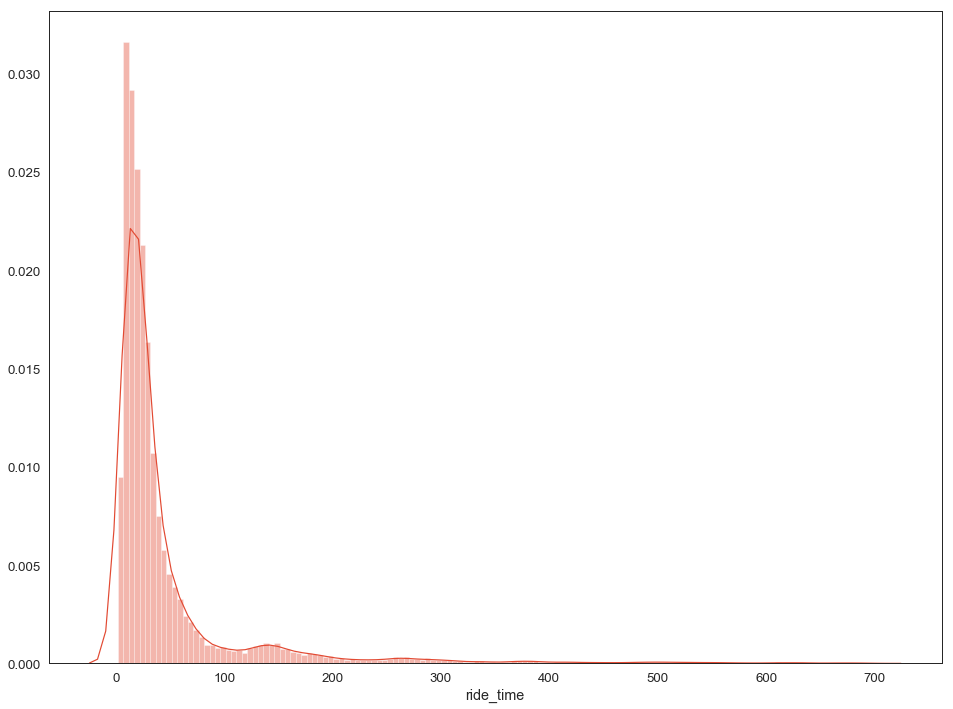

In [32]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['ride_time'], bins = 140)

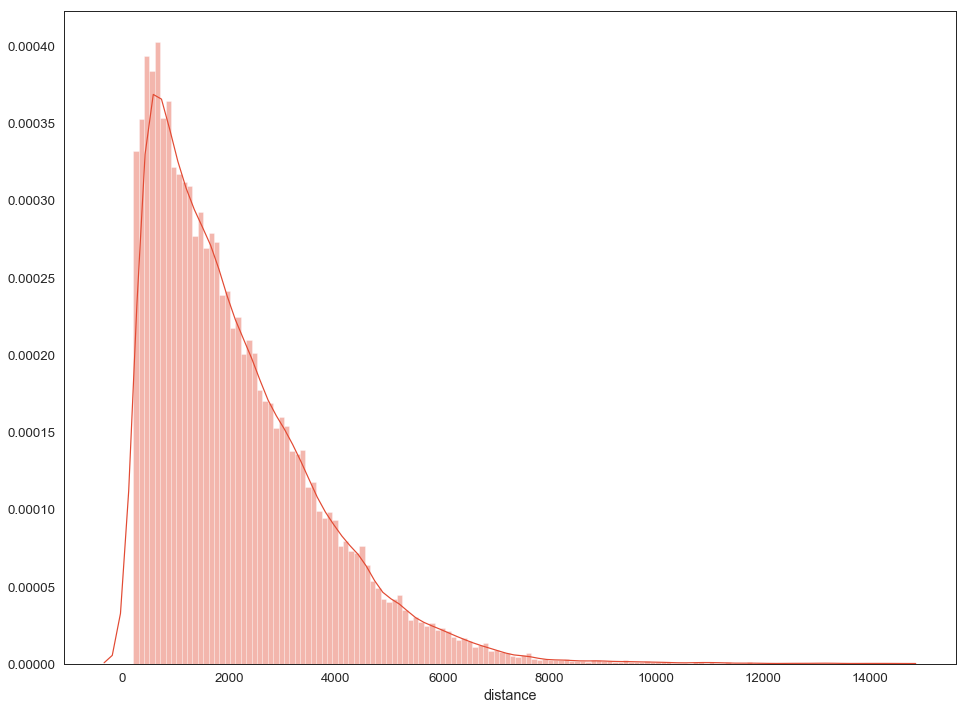

In [33]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['distance'], bins = 140)

In [34]:
rows_with_nan = []
for index, row in df_c.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

In [35]:
df_adr = df_c.drop(rows_with_nan, axis=0)

In [36]:
df_adr

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
114,137,50.938361,6.959974,50.960532,7.005137,2020-04-04 05:42:02,2020-04-04 11:46:02,364.0,4012.0,28843569,28855252,862.0,Köln - Dortmunder Straße 45/43,BIKE 22848,1181
584,700,50.916295,6.933415,50.920062,6.954939,2020-04-07 14:32:02,2020-04-07 14:56:02,24.0,1566.0,28806053,28921137,8989.0,köln linzer straße,BIKE 21254,1186
591,707,50.949107,6.918519,50.954484,6.957484,2020-04-09 15:10:01,2020-04-09 15:31:02,21.0,2795.0,28966648,28969025,55.0,Venloer Str. 310,BIKE 21254,1184
606,726,50.967161,6.961132,50.944927,6.932409,2020-04-15 14:12:02,2020-04-15 14:32:01,20.0,3188.0,29084072,29093676,1025.0,Xantener Straße 11,BIKE 21254,1145
616,737,50.954972,6.904870,50.922560,6.925694,2020-04-20 17:40:03,2020-04-20 18:03:02,23.0,3889.0,29191479,29220444,1418.0,Köln - Gumprechtstr. 19,BIKE 21254,1125
620,747,50.946224,6.952896,50.920494,6.932717,2020-04-30 20:12:01,2020-04-30 20:36:02,24.0,3192.0,29368384,29472624,4718.0,Eintrachtstraße 102,BIKE 21254,1140
800,1012,50.915810,6.926963,50.917114,6.906803,2020-04-23 20:58:02,2020-04-23 23:34:02,156.0,1421.0,29297825,29302371,106.0,Sülzburg Straße 34,BIKE 21054,1140
801,1014,50.933410,6.981240,50.942756,6.994751,2020-04-25 13:16:03,2020-04-25 13:54:02,38.0,1406.0,29326488,29339150,1012.0,Alarichstr. 40,BIKE 21054,1154
803,1017,50.943862,6.971347,50.938341,6.944973,2020-04-28 11:34:01,2020-04-28 13:59:02,145.0,1948.0,29408933,29415580,335.0,Picassoplatz 1,BIKE 21054,1177
864,1098,50.939558,6.954619,50.937660,6.924771,2020-04-08 17:53:02,2020-04-08 18:59:02,66.0,2103.0,28922498,28952432,624.0,"Hohe Str. 121-131, 50667 Köln",BIKE 21734,1185


In [37]:
previous_index = 0
previous_distance = df_c.iloc[0]['distance']
suspicious_return_trips = []
for index,row in islice(df_c.iterrows(), 1, None):
    if (row['distance'] == previous_distance):
        suspicious_return_trips.append(previous_index)
        suspicious_return_trips.append(index)
        
    previous_index = index
    previous_distance = row['distance']

In [38]:
df_c.iloc[suspicious_return_trips]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
827,1052,50.934749,6.997712,50.947788,6.907322,2020-04-13 10:32:02,2020-04-13 11:07:02,35.0,6499.0,29047127,29058655,962.0,NaN,BIKE 21118,1093
828,1053,50.947788,6.907322,50.933741,6.997321,2020-04-13 19:01:02,2020-04-13 22:14:02,193.0,6499.0,29058655,29066799,474.0,NaN,BIKE 21118,1174
1154,1455,50.965159,6.945426,50.959147,6.939283,2020-04-27 13:49:01,2020-04-27 13:58:02,9.0,795.0,29388910,29389606,20.0,NaN,BIKE 22138,1145
1155,1456,50.959147,6.939283,50.965112,6.945545,2020-04-27 15:05:01,2020-04-27 15:13:02,8.0,795.0,29389606,29391636,67.0,NaN,BIKE 22138,1157
1450,1834,50.946484,6.959489,50.956175,6.909812,2020-04-06 16:50:02,2020-04-06 17:28:02,38.0,3644.0,28896663,28903654,249.0,NaN,BIKE 21602,1164
1451,1835,50.956175,6.909812,50.945286,6.958861,2020-04-07 09:00:01,2020-04-07 14:00:03,300.0,3644.0,28903654,28915881,932.0,NaN,BIKE 21602,1124
1998,2548,50.926662,7.009606,50.927983,7.005327,2020-04-24 13:55:02,2020-04-24 14:12:02,17.0,334.0,29283505,29313556,1571.0,NaN,BIKE 22173,1133
1999,2549,50.927983,7.005327,50.926571,7.009527,2020-04-24 14:12:02,2020-04-24 14:18:02,6.0,334.0,29313556,29314005,0.0,NaN,BIKE 22173,1173
3007,3787,50.961092,6.980727,50.940432,6.960981,2020-04-13 18:22:01,2020-04-13 18:56:01,34.0,2682.0,29053302,29065965,1286.0,NaN,BIKE 21991,1142
3008,3788,50.940432,6.960981,50.961121,6.980626,2020-04-13 19:05:02,2020-04-13 19:31:02,26.0,2682.0,29065965,29066803,9.0,NaN,BIKE 21991,1146


In [39]:
def cal_distance_in_meters(speed, time):
    return (speed * round((time/60),1))*1000;

In [40]:
def cal_dis(speed, time):
    print(" Time(hr) :", time) ;
    print(" Speed(km / hr) :", speed);
    return speed * time;

print(" The calculated Distance(km) :",
                   cal_dis(20, 0.3));

 Time(hr) : 0.3
 Speed(km / hr) : 20
 The calculated Distance(km) : 6.0


In [41]:
calculated_distances = []
for row,col in df_c.iterrows():
    recorded_distance = df_c['distance'][row]
    duration = df_c['ride_time'][row]
    
    calculated_distance = cal_distance_in_meters(25, duration)
    calculated_distances.append(calculated_distance)

In [42]:
for d in range(len(calculated_distances)):
    calculated_distances[d] = round(calculated_distances[d] + 1500, 1)

In [43]:
df_c['calculated_distance'] = calculated_distances

In [44]:
unmatched_distances = []
for index, row in df_c.iterrows():
    if df_c['distance'][index] > df_c['calculated_distance'][index]:
        unmatched_distances.append(index)

In [45]:
df_c.iloc[unmatched_distances]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes,calculated_distance
7054,8734,51.030142,6.911677,50.936763,6.968697,2020-04-11 16:56:01,2020-04-11 17:06:01,10.0,11127.0,29014859,29019835,125.0,NaN,BIKE 22137,1175,6500.0
9352,11663,50.954804,6.915975,50.923891,6.958769,2020-04-22 13:02:02,2020-04-22 13:07:02,5.0,4563.0,29255033,29259471,275.0,NaN,BIKE 22489,1144,4000.0
20168,25745,50.892824,7.002666,50.928461,6.942769,2020-04-06 20:00:02,2020-04-06 20:08:02,8.0,5776.0,28908047,28909566,45.0,NaN,BIKE 21267,1119,4000.0
24660,31343,50.943905,6.888227,50.917465,6.927133,2020-04-22 17:51:02,2020-04-22 17:57:02,6.0,4011.0,29266657,29268406,37.0,NaN,BIKE 21367,1092,4000.0
25118,31921,50.828813,6.912873,50.944714,6.928546,2020-04-05 16:23:02,2020-04-05 16:39:02,16.0,12938.0,28880673,28881669,9.0,NaN,BIKE 21088,1132,9000.0
26298,33471,50.967300,7.055912,50.954198,6.956988,2020-04-25 13:39:01,2020-04-25 13:51:02,12.0,7082.0,29306036,29339107,1908.0,NaN,BIKE 22731,1167,6500.0
26358,33541,50.941241,7.009091,50.912019,6.937718,2020-04-28 21:04:02,2020-04-28 21:08:02,4.0,5967.0,29402353,29428245,1517.0,NaN,BIKE 22919,1121,4000.0
28329,36274,50.954097,6.957029,50.931440,6.893436,2020-04-14 14:36:02,2020-04-14 14:44:01,8.0,5120.0,29076601,29076743,1.0,NaN,BIKE 21388,1153,4000.0
37812,48505,50.960962,6.996913,50.943945,6.944070,2020-04-08 12:48:01,2020-04-08 12:53:01,5.0,4158.0,28937080,28941086,261.0,NaN,BIKE 22732,1178,4000.0
39984,51299,50.908592,6.970524,50.939752,6.930233,2020-04-01 20:42:02,2020-04-01 20:46:02,4.0,4471.0,28797151,28817813,1242.0,NaN,BIKE 22737,1189,4000.0


In [46]:
len(unmatched_distances)

15

In [47]:
for i in unmatched_distances:
    if i in df_c.index.values:
        df_c.drop(i, inplace=True)

In [48]:
df_c.reset_index(inplace=True)

In [49]:
df_c['address'].value_counts(dropna=False)

NaN                                             45149
Tiefentalstraße 31                                  2
Kitschburger Straße                                 2
Neuer Weyerstraßerweg 3                             2
Girlitzweg 28                                       1
Weinsbergstr. 190                                   1
Köln - Friedrich-Karl-Str. / Boltensternstr.        1
conrad adenauer straße 51                           1
Bischofsgartenstraße 5                              1
Steprathstraße 11                                   1
Schönsteinstraße 63                                 1
Köln - Weyertal 115                                 1
thywissenstraße 8                                   1
Scheidtweiler Str.                                  1
köln linzer straße                                  1
Von-Werth-Straße 42 50670 Köln                      1
lindenallee 88 / bonner straße                      1
Trakenerstr. 25                                     1
Raumerstraße 15             

In [50]:
df_c.rename(columns={"index": "old_index"}, inplace=True)
df_c.drop(['level_0', 'address'], axis=1, inplace=True)

In [51]:
df_c.to_csv('/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2020-04.csv', sep=';', index=False) 

In [52]:
len(df_c)

45382